In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\USER\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['hist', 'gradient']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [45]:
!wget -O dataset.csv https://archive.ics.uci.edu/ml/machine

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [46]:
!head -3 dataset.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [47]:
import pandas as pd

In [48]:
# Loading the data
df = pd.read_csv('breast-cancer-wisconsin.data', names=[
  "id number",
  "Clump Thickness",
  "Uniformity of Cell Size",
  "Uniformity of Cell Shape",
  "Marginal Adhesion",
  "Single Epithelial Cell Size",
  "Bare Nuclei",
  "Bland Chromatin",
  "Normal Nucleoli",
  "Mitoses",
  "Class"
])

In [49]:
df.head()

id number  Clump Thickness  Uniformity of Cell Size  \
0    1000025                5                        1   
1    1002945                5                        4   
2    1015425                3                        1   
3    1016277                6                        8   
4    1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1      2  
1          10                3                2        1      2  
2           2                3                1        1      2  
3           4                3                7        1      2  
4           1                3                1        1      2

In [50]:
# Data cleaning
df = df.replace('?',np.NaN)
df.isna().sum()

id number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [51]:
# To NumPy & feature selection
X = df[["Clump Thickness",
  "Uniformity of Cell Size",
  "Uniformity of Cell Shape",
  "Marginal Adhesion",
  "Single Epithelial Cell Size",
  "Bare Nuclei",
  "Bland Chromatin",
  "Normal Nucleoli",
  "Mitoses"
]].values.astype(np.float32)
X.shape

idx = np.where(np.isnan(X))
X[idx] = np.take(np.nanmedian(X, axis = 0), idx[1])

y = df['Class'].values
y.shape

(699,)

In [52]:
# Cleaning y
# we only run this cell once.
if y[0] == 2:
  y = np.array(y == 4, dtype=np.float32)

y.shape, y[:10]


((699,), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [53]:
# Bias Factor
X = np.hstack((np.ones((len(X), 1)), X))
X[:10]

array([[ 1.,  5.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 1.,  5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.],
       [ 1.,  3.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  1.],
       [ 1.,  6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.],
       [ 1.,  4.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.],
       [ 1.,  8., 10., 10.,  8.,  7., 10.,  9.,  7.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  2., 10.,  3.,  1.,  1.],
       [ 1.,  2.,  1.,  2.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  5.],
       [ 1.,  4.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.]])

In [54]:
# Stats
m, n = X.shape
K = 2
K, m, n

(2, 699, 10)

In [55]:
# Training a model
theta = np.zeros(n)

In [56]:
# The model
def g(z):
  """ sigmoid """
  return 1 / (1 + np.exp(-z))

def h(X, theta):
  return g(X @ theta)

preds = h(X, theta)
preds.shape, preds[:10]

((699,), array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]))

In [57]:
# Cost functions & Gradients
def J(preds, y):
  return 1/m * (-y @ np.log(preds) - (1 - y) @ np.log(1 - preds))

def compute_gradient(theta, X, y):
  preds = h(X, theta)
  gradient = 1/m * X.T @ (preds - y)
  return gradient

compute_gradient(theta, X, y)

preds = h(X, theta)
J(preds, y)

0.6931471805599452

In [58]:
# Training Loop

hist = {'loss': [], 'acc': []}
alpha = 0.1

for i in range(100):
  gradient = compute_gradient(theta, X, y)
  theta -= alpha * gradient

  # loss
  preds = h(X, theta)
  loss = J(preds, y)
  hist['loss'].append(loss)

  # acc
  c = 0
  for j in range(len(y)):
    if (h(X[j], theta) > .5) == y[j]:
      c += 1
  acc = c / len(y)
  hist['acc'].append(acc)

  # print stats
  if i % 10 == 0: print(loss, acc)

0.7306617045761895 0.3447782546494993
0.465080013079729 0.8469241773962805
0.38340821789823426 0.9055793991416309
0.353472372891963 0.9141630901287554
0.33271666973853586 0.9184549356223176
0.3168806343469845 0.9256080114449213
0.30406577744783664 0.9256080114449213
0.2932708495641543 0.9313304721030042
0.2839128193761681 0.9298998569384835
0.27562709474198477 0.9313304721030042


Text(0.5, 0, 'accuracy')

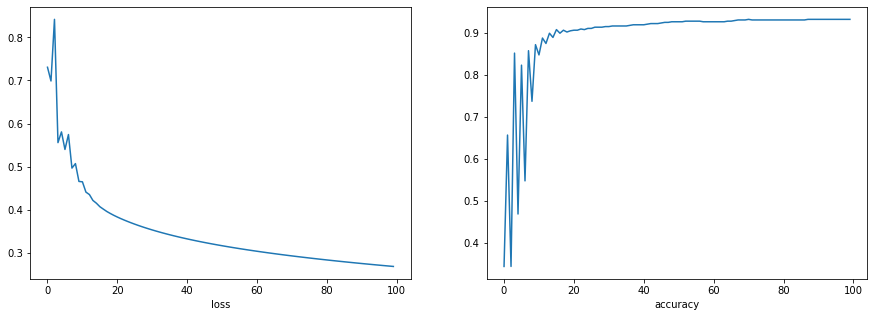

In [59]:
# Training evaluation
figsize(15, 5)
subplot(1, 2, 1)
plot(hist['loss'])
xlabel('loss')
subplot(1, 2, 2)
plot(hist['acc'])
xlabel('accuracy')

In [60]:
# Final Performance
hist['loss'][-1], hist['acc'][-1]

(0.2688861031735937, 0.9313304721030042)

In [61]:
# Accuracy
preds = h(X, theta) > 0.5
(preds == y).sum() / len(y)

0.9313304721030042

In [62]:
#  F1
def precision(preds, labels):
  tp = ((preds == 1) == (y == 1)).sum()
  fp = ((preds == 1) == (y == 0)).sum()
  return tp / (tp + fp)

precision(preds, y)

0.9313304721030042

In [63]:
def recall(preds, labels):
  tp = ((preds == 1) == (y == 1)).sum()
  fn = ((preds == 0) == (y == 1)).sum()
  return tp / (tp + fn)

recall(preds, y)

0.9313304721030042

In [64]:
def f1(preds, labels):
  return 2 * (precision(preds, labels) * recall(preds, labels)) / (precision(preds, labels) + recall(preds, labels))

f1(preds, y)

0.9313304721030042

In [65]:
# Optimizing model performance
recalls = []
for p in range(100):
  preds = (h(X, theta) > (p / 100))
  r = recall(preds, y)
  recalls.append(r)

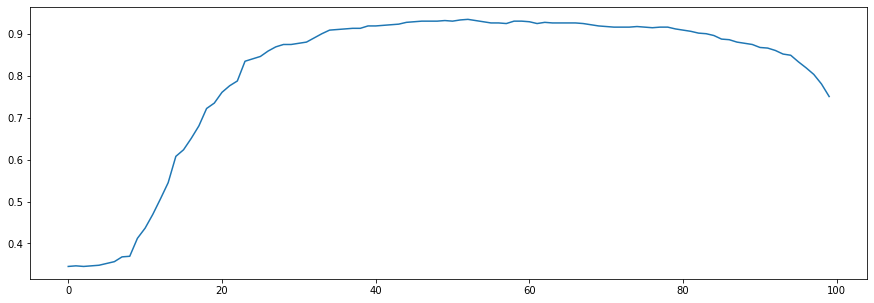

In [66]:
plot(recalls)

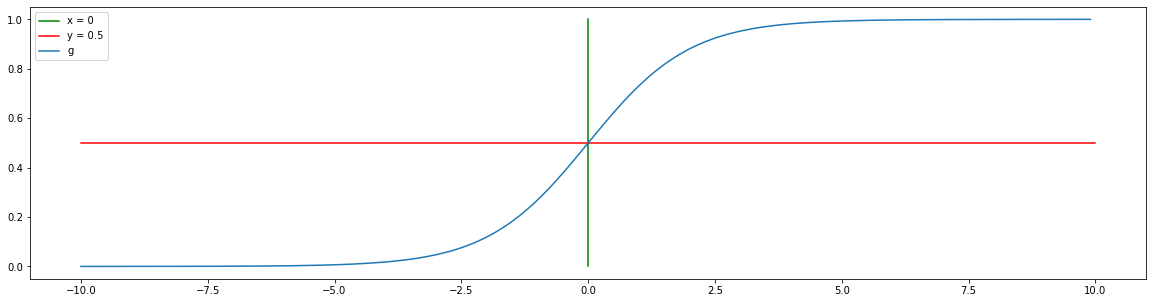

In [67]:
# Graphics
figsize(20, 5)
x = np.arange(-10, 10, 0.1)
plot((0, 0), (0, 1), 'g-', label='x = 0')
plot((-10, 10), (0.5, 0.5), 'r-', label='y = 0.5')
plot(x, g(x), label='g')
legend()